In [2]:
import sys
import pandas as pd
import numpy as np
from scipy.io import whosmat
from scipy.io import loadmat
from io import BytesIO
import datetime

print(sys.executable)

g:\DIYguru\Data-Science-and-Engineering-Analytics\.venv\Scripts\python.exe


### Dataset Acquisition

In [ ]:
print(whosmat(r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0005.mat'))
print(whosmat(r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0006.mat'))
print(whosmat(r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0007.mat'))
print(whosmat(r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0018.mat'))

In [ ]:
file_path_B0005 = r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0005.mat'
file_path_B0006 = r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0006.mat'
file_path_B0007 = r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0007.mat'
file_path_B0018 = r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0018.mat'

data_B0005 = loadmat(file_path_B0005, struct_as_record=False, squeeze_me=True)
data_B0006 = loadmat(file_path_B0006, struct_as_record=False, squeeze_me=True)
data_B0007 = loadmat(file_path_B0007, struct_as_record=False, squeeze_me=True)
data_B0018 = loadmat(file_path_B0018, struct_as_record=False, squeeze_me=True)

# Access the struct
b0005 = data_B0005['B0005']
b0006 = data_B0006['B0006']
b0007 = data_B0007['B0007']
b0018 = data_B0018['B0018']

# Check what attributes (fields) this struct has
print('b0005 \n',dir(b0005))
print('b0006 \n',dir(b0006))
print('b0007 \n',dir(b0007))
print('b0018 \n',dir(b0018))

In [ ]:
print(b0005.cycle)
print(b0006.cycle)
print(b0007.cycle)
print(b0018.cycle)

In [ ]:
cycles = b0005.cycle
#cycles = b0006.cycle
#cycles = b0007.cycle
#cycles = b0018.cycle

print(type(cycles))

In [ ]:
print(len(cycles),"\n")

print(cycles[0],"\n")
print([col for col in dir(cycles[0]) if not col.startswith('_')],"\n") 

print(cycles[0].data,"\n")
print([col for col in dir(cycles[0].data) if not col.startswith('_')],"\n") 


In [ ]:
for i in range(len(cycles)):
    print("cycle",i,": ", cycles[i],"--",[col for col in dir(cycles[i]) if not col.startswith('_')])

In [ ]:
for i in range(len(cycles)):
    print("cycle",i,": ", cycles[i],"--",[col for col in dir(cycles[i].data) if not col.startswith('_')])

In [ ]:
for i in range(len(cycles)):
    print(f"cycle {i}: ambient_temperature = {cycles[i].ambient_temperature}")
    print(f"cycle {i}: time = {cycles[i].time}")
    print(f"cycle {i}: type = {cycles[i].type}")
    if cycles[i].type == 'charge':
        print(f"cycle {i}: Current_charge = {cycles[i].data.Current_charge}")
        print(f"cycle {i}: Current_measured = {cycles[i].data.Current_measured}")
        print(f"cycle {i}: Temperature_measured = {cycles[i].data.Temperature_measured}")
        print(f"cycle {i}: Time = {cycles[i].data.Time}")
        print(f"cycle {i}: Voltage_charge = {cycles[i].data.Voltage_charge}")
        print(f"cycle {i}: Voltage_measured = {cycles[i].data.Voltage_measured}")
    elif cycles[i].type == 'discharge':
        print(f"cycle {i}: Capacity = {cycles[i].data.Capacity}")
        print(f"cycle {i}: Current_load = {cycles[i].data.Current_load}")
        print(f"cycle {i}: Current_measured = {cycles[i].data.Current_measured}")
        print(f"cycle {i}: Temperature_measured = {cycles[i].data.Temperature_measured}")
        print(f"cycle {i}: Time = {cycles[i].data.Time}")
        print(f"cycle {i}: Voltage_load = {cycles[i].data.Voltage_load}")
        print(f"cycle {i}: Voltage_measured = {cycles[i].data.Voltage_measured}")
    elif cycles[i].type == 'impedance':
        print(f"cycle {i}: Battery_current = {cycles[i].data.Battery_current}")
        print(f"cycle {i}: Battery_impedance = {cycles[i].data.Battery_impedance}")
        print(f"cycle {i}: Current_ratio = {cycles[i].data.Current_ratio}")
        print(f"cycle {i}: Rct = {cycles[i].data.Rct}")
        print(f"cycle {i}: Re = {cycles[i].data.Re}")
        print(f"cycle {i}: Rectified_Impedance = {cycles[i].data.Rectified_Impedance}")
        print(f"cycle {i}: Sense_current = {cycles[i].data.Sense_current}")
    

### Function Explanation

- **def export_cycles_flattened(battery_name, cycles, export_filename, N=None):**
    - Defines a function to flatten and export battery cycle data.
    - `battery_name`: Name/identifier of the battery (used in output).
    - `cycles`: Iterable/list of cycle objects (each could be charge/discharge/impedance).
    - `export_filename`: Output filename for the CSV.
    - `N`: Number of cycles to process (if `None` or `0`, process all cycles).

- **rows = []**
    - Initialize an empty list to store each "flattened" row.

- **total_cycles = len(cycles) if N is None or N == 0 else min(N, len(cycles))**
    - Decide how many cycles to process: all if `N` not provided, or up to `N` cycles.

- **for i, cycle in enumerate(cycles):**
    - Loop over each cycle with index `i`.

- **if i >= total_cycles:**
    - If processed enough cycles, break out of loop.

- **cycle_type = getattr(cycle, 'type', None)**
    - Get the cycle's type attribute ('charge', 'discharge', 'impedance', etc).

- **if not hasattr(cycle, 'data'):**
    - If the cycle has no 'data' attribute, skip this cycle.

- **data = cycle.data**
    - Get the data object for the current cycle.

- **if cycle_type == 'charge':**
    - For charge cycles, define relevant columns.

- **columns = [...]**
    - Specify the list of attributes to extract, depending on the cycle type.

- **elif cycle_type == 'discharge':**
    - For discharge cycles, define different relevant columns.

- **elif cycle_type == 'impedance':**
    - For impedance cycles, yet another set of columns is defined.

- **else:**
    - If cycle type doesn't match any expected, skip the cycle.

- **arr_lens = []**
    - Prepare to find the length of each data array for the chosen columns.

- **for col in columns:**
    - For each column to extract:

- **arr = getattr(data, col, None)**
    - Get the array for the current column, if it exists.

- **if arr is not None and hasattr(arr, '__len__'):**
    - Check if the data exists and is an array with a length.

- **arr_lens.append(len(arr))**
    - Store the array length for this column.

- **if not arr_lens:**
    - If no arrays found, skip this cycle.

- **min_len = min(arr_lens)**
    - Find the (minimum) length of these arrays; ensures no index-out-of-bounds below.

- **for idx in range(min_len):**
    - Loop over array indices, up to the shortest array length (to keep data aligned).

- **row = { ... }**
    - Create a new dictionary to represent a single "flattened" row, including:
        - battery_name, cycle index, type, ambient temp, time (as a datetime).

- **if cycle_type == 'impedance':**
    - If current type is impedance, columns are postprocessed for real part.

- **for col in columns:**
    - For all columns of this cycle type:

- **arr = getattr(data, col, None)**
    - Fetch the column's array again.

- **value = arr[idx] if arr is not None and hasattr(arr, '__getitem__') else None**
    - Safely retrieve the value at current index.

- **row[col] = np.real(value) if value is not None else None**
    - For impedance, store just the real component if it's complex; else None.

- **else:**
    - For other types ('charge'/'discharge'):

- **row[col] = value**
    - Store the value as-is.

- **rows.append(row)**
    - Add this row (dictionary) to the list of all rows.

- **df = pd.DataFrame(rows)**
    - Create a pandas DataFrame from the collected rows.

- **df.to_csv(export_filename, index=False)**
    - Save the DataFrame to CSV (no row index).

- **print(f"Exported flattened DataFrame to {export_filename}")**
    - Print a confirmation message.

- **return df**
    - Return the created DataFrame for further use.

In [ ]:
def export_cycles_flattened(battery_name, cycles, export_filename, N=None):

    # No more type_counts logic, handle all cycles or as per N
    rows = []
    total_cycles = len(cycles) if N is None or N == 0 else min(N, len(cycles))

    for i, cycle in enumerate(cycles):
        if i >= total_cycles:
            break
        cycle_type = getattr(cycle, 'type', None)
        if not hasattr(cycle, 'data'):
            continue

        data = cycle.data
        if cycle_type == 'charge':
            columns = ['Current_charge', 'Current_measured', 'Temperature_measured', 'Time', 'Voltage_charge', 'Voltage_measured']
        elif cycle_type == 'discharge':
            columns = ['Capacity', 'Current_load', 'Current_measured', 'Temperature_measured', 'Time', 'Voltage_load', 'Voltage_measured']
        elif cycle_type == 'impedance':
            columns = ['Battery_current', 'Battery_impedance', 'Current_ratio', 'Rct', 'Re', 'Rectified_Impedance', 'Sense_current']
        else:
            continue

        arr_lens = []
        for col in columns:
            arr = getattr(data, col, None)
            if arr is not None and hasattr(arr, '__len__'):
                arr_lens.append(len(arr))
        if not arr_lens:
            continue
        min_len = min(arr_lens)

        for idx in range(min_len):
            row = {
                'battery_name': battery_name,
                'cycle': i,
                'type': cycle_type,
                'ambient_temperature': getattr(cycle, 'ambient_temperature', None),
                'time': datetime.datetime(*[int(x) for x in getattr(cycle, 'time', [9999,12,31,0,0,0])])
            }
            
            if cycle_type == 'impedance':
                for col in columns:
                    arr = getattr(data, col, None)
                    value = arr[idx] if arr is not None and hasattr(arr, '__getitem__') else None
                    row[col] = np.real(value) if value is not None else None
            else:
                for col in columns:
                    arr = getattr(data, col, None)
                    value = arr[idx] if arr is not None and hasattr(arr, '__getitem__') else None
                    row[col] = value
            rows.append(row)

    df = pd.DataFrame(rows)
    df.to_csv(export_filename, index=False)
    print(f"Exported flattened DataFrame to {export_filename}")
    return df

# Example usage:
# export_cycles_flattened(cycles, 'Flattened_b0006.csv', N=10)

In [ ]:
df = export_cycles_flattened('b0007', cycles, 'Flattened_b0007.csv')

In [ ]:
battery_objs = {
    'b0005': b0005.cycle,
    'b0006': b0006.cycle,
    'b0007': b0007.cycle,
    'b0018': b0018.cycle
}

for name, cycles in battery_objs.items():
    csv_name = f'Flattened_{name}.csv'
    df = export_cycles_flattened(name, cycles, csv_name)
    print(f'Exported {csv_name}')

In [ ]:
df.head()

### Data Load from csv to Amazon s3

In [3]:
'''
This cell loads AWS credentials from a .env file using python-dotenv,
creates a boto3 S3 client with those credentials,
and lists all S3 buckets in the account.
'''

import os
from dotenv import load_dotenv
import boto3

# Load environment variables from .env
load_dotenv()

# Create boto3 client using loaded environment variables
s3 = boto3.client("s3",
    aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
    region_name=os.getenv("AWS_DEFAULT_REGION")
)

# Example: list buckets
buckets = s3.list_buckets()
print("Your S3 Buckets:")
for bucket in buckets['Buckets']:
    print(f" - {bucket['Name']}")

Your S3 Buckets:
 - s3aravindh973515031797


In [ ]:
import os
import pandas as pd

def load_files_from_directory(directory_path, file_types=('csv', 'xls', 'xlsx')):
    """
    Load and append CSV and Excel files from a given directory into a single pandas DataFrame.

    Args:
        directory_path (str): Path to the directory containing the files.
        file_types (tuple): File types to load. Default is ('csv', 'xls', 'xlsx').

    Returns:
        pd.DataFrame: A single DataFrame containing data from all files.
    """
    dataframes = []
    for filename in os.listdir(directory_path):
        filepath = os.path.join(directory_path, filename)
        if os.path.isfile(filepath):
            ext = filename.lower().split('.')[-1]
            try:
                if ext == 'csv' and 'csv' in file_types:
                    df = pd.read_csv(filepath)
                    dataframes.append(df)
                elif ext in ['xls', 'xlsx'] and ext in file_types:
                    df = pd.read_excel(filepath)
                    dataframes.append(df)
            except Exception as e:
                print(f"Failed to load {filename}: {e}")
    if dataframes:
        return pd.concat(dataframes, ignore_index=True)
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no files are loaded

In [ ]:
DATA_DIR = r"G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\jupyter_notebooks"
DATA_DIR = load_files_from_directory(DATA_DIR)

print(f"Combined DataFrame shape: {DATA_DIR.shape}")

In [ ]:
bucket_name = 's3aravindh973515031797'

response = s3.list_objects_v2(Bucket=bucket_name)
for item in response.get("Contents", []):
    print(item["Key"])

In [ ]:
def push_df_to_s3_parquet(df, object_key):
    """
    Pushes a pandas DataFrame to a predefined S3 bucket as a Parquet file.

    Args:
        df (pd.DataFrame): DataFrame to upload.
        object_key (str): S3 object key (path/filename.parquet).
    """
    from io import BytesIO
    parquet_buffer = BytesIO()
    df.to_parquet(parquet_buffer, index=False)
    parquet_buffer.seek(0)
    s3.upload_fileobj(parquet_buffer, bucket_name, object_key)
    print(f"DataFrame uploaded to s3://{bucket_name}/{object_key}")

# Example usage:
# push_df_to_s3_parquet(df_static, 'path/to/df_static.parquet')

In [ ]:
push_df_to_s3_parquet(DATA_DIR, 'EV_Battery_Health_Source/EV_Battery_Health_Source.parquet')

### Data Load from Amazon s3 bucket

In [4]:
from io import BytesIO

def read_parquet_from_s3(bucket_name, object_key):
        """
        Reads a Parquet file from an AWS S3 bucket using the global s3 client.

        Args:
            bucket_name: Name of the S3 bucket.
            object_key: Key (path) to the Parquet file in the S3 bucket.

        Returns:
            DataFrame containing the Parquet data.
        """
        response = s3.get_object(Bucket=bucket_name, Key=object_key)
        file_content = response['Body'].read()
        df = pd.read_parquet(BytesIO(file_content))
        return df

In [ ]:
#del df

In [5]:
bucket_name = 's3aravindh973515031797'
df = 'EV_Battery_Health_Source/EV_Battery_Health_Source.parquet'

In [6]:
df = read_parquet_from_s3(bucket_name, df)

In [7]:
df.head()

,battery_name,cycle,type,ambient_temperature,time,Current_charge,Current_measured,Temperature_measured,Time,Voltage_charge,...,Capacity,Current_load,Voltage_load,Battery_current,Battery_impedance,Current_ratio,Rct,Re,Rectified_Impedance,Sense_current
0,b0005,0,charge,24,2008-04-02 13:08:17,0.000,-0.001201,24.655358,0.000,0.003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b0005,0,charge,24,2008-04-02 13:08:17,-4.036,-4.030268,24.666480,2.532,1.570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.512731,24.675394,5.500,4.726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.509063,24.693865,8.344,4.742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.511318,24.705069,11.125,4.753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123643 entries, 0 to 2123642
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   battery_name          object 
 1   cycle                 int64  
 2   type                  object 
 3   ambient_temperature   int64  
 4   time                  object 
 5   Current_charge        float64
 6   Current_measured      float64
 7   Temperature_measured  float64
 8   Time                  float64
 9   Voltage_charge        float64
 10  Voltage_measured      float64
 11  Capacity              float64
 12  Current_load          float64
 13  Voltage_load          float64
 14  Battery_current       float64
 15  Battery_impedance     float64
 16  Current_ratio         float64
 17  Rct                   float64
 18  Re                    float64
 19  Rectified_Impedance   float64
 20  Sense_current         float64
dtypes: float64(16), int64(2), object(3)
memory usage: 340.2+ MB


### Exploratory Data Analysis (EDA)

### Battery Basics: Charge, Discharge & Impedance (Simple Definitions)

| Term | Meaning | EV Car Analogy |
|------|---------|----------------|
| **Charge** | Process of **storing energy** in the battery by supplying electrical power. | Plugging your EV into a charging station — electricity flows in and refills the "energy tank." |
| **Discharge** | Process of **using the stored energy** to power a device or motor. | When you drive the EV, the stored battery energy powers the wheels and systems. |
| **Impedance** | The **resistance to the flow of current** inside the battery, including both electrical and chemical reactions. Higher impedance reduces performance. | If your EV’s internal components become harder for electricity to flow through (like a clogged fuel line in petrol cars), acceleration and range drop. |

**Low impedance** = better efficiency, more power delivery  
**High impedance** = aging battery, heat generation, reduced range


In [9]:
# unique battery name

print("battery_name \n",df['battery_name'].unique())
print("type \n",df['type'].unique())
print("cycle \n",df['cycle'].unique())

battery_name 
 ['b0005' 'b0006' 'b0007' 'b0018']
type 
 ['charge' 'discharge' 'impedance']
cycle 
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 

In [10]:
df[['battery_name','type','cycle','Capacity','Voltage_measured','Current_measured','Temperature_measured']].head()

,battery_name,type,cycle,Capacity,Voltage_measured,Current_measured,Temperature_measured
0,b0005,charge,0,NaN,3.873017,-0.001201,24.655358
1,b0005,charge,0,NaN,3.479394,-4.030268,24.666480
2,b0005,charge,0,NaN,4.000588,1.512731,24.675394
3,b0005,charge,0,NaN,4.012395,1.509063,24.693865
4,b0005,charge,0,NaN,4.019708,1.511318,24.705069


In [11]:
df[df['type'] == 'charge'][['battery_name','type','cycle','Capacity','Current_charge', 'Current_measured', 'Temperature_measured', 'Time', 'Voltage_charge', 'Voltage_measured']].head()

#['Current_charge', 'Current_measured', 'Temperature_measured', 'Time', 'Voltage_charge', 'Voltage_measured']

,battery_name,type,cycle,Capacity,Current_charge,Current_measured,Temperature_measured,Time,Voltage_charge,Voltage_measured
0,b0005,charge,0,NaN,0.000,-0.001201,24.655358,0.000,0.003,3.873017
1,b0005,charge,0,NaN,-4.036,-4.030268,24.666480,2.532,1.570,3.479394
2,b0005,charge,0,NaN,1.500,1.512731,24.675394,5.500,4.726,4.000588
3,b0005,charge,0,NaN,1.500,1.509063,24.693865,8.344,4.742,4.012395
4,b0005,charge,0,NaN,1.500,1.511318,24.705069,11.125,4.753,4.019708


In [12]:
df[df['type'] == 'discharge'][['battery_name','type','cycle','Capacity', 'Current_load', 'Current_measured', 'Temperature_measured', 'Time', 'Voltage_load', 'Voltage_measured']].head()

#['Capacity', 'Current_load', 'Current_measured', 'Temperature_measured', 'Time', 'Voltage_load', 'Voltage_measured']

,battery_name,type,cycle,Capacity,Current_load,Current_measured,Temperature_measured,Time,Voltage_load,Voltage_measured
789,b0005,discharge,1,NaN,-0.0006,-0.004902,24.330034,0.000,0.000,4.191492
790,b0005,discharge,1,NaN,-0.0006,-0.001478,24.325993,16.781,4.206,4.190749
791,b0005,discharge,1,NaN,-1.9982,-2.012528,24.389085,35.703,3.062,3.974871
792,b0005,discharge,1,NaN,-1.9982,-2.013979,24.544752,53.781,3.030,3.951717
793,b0005,discharge,1,NaN,-1.9982,-2.011144,24.731385,71.922,3.011,3.934352


In [13]:
df[df['type'] == 'impedance'][['battery_name','type','cycle','Capacity','Battery_current', 'Battery_impedance', 'Current_ratio', 'Rct', 'Re', 'Rectified_Impedance', 'Sense_current']].head()

#['Battery_current', 'Battery_impedance', 'Current_ratio', 'Rct', 'Re', 'Rectified_Impedance', 'Sense_current']

,battery_name,type,cycle,Capacity,Battery_current,Battery_impedance,Current_ratio,Rct,Re,Rectified_Impedance,Sense_current
22900,b0005,impedance,40,NaN,-1.000000,-0.438926,1.000000,NaN,NaN,0.070069,-1.000000
22901,b0005,impedance,40,NaN,337.091461,0.130088,2.320415,NaN,NaN,0.068179,820.609497
22902,b0005,impedance,40,NaN,330.631561,0.058771,2.424193,NaN,NaN,0.067933,827.242188
22903,b0005,impedance,40,NaN,330.808624,0.005814,2.447002,NaN,NaN,0.066918,827.193481
22904,b0005,impedance,40,NaN,332.682678,0.126081,2.434305,NaN,NaN,0.068071,824.929504


In [14]:
df.head()

,battery_name,cycle,type,ambient_temperature,time,Current_charge,Current_measured,Temperature_measured,Time,Voltage_charge,...,Capacity,Current_load,Voltage_load,Battery_current,Battery_impedance,Current_ratio,Rct,Re,Rectified_Impedance,Sense_current
0,b0005,0,charge,24,2008-04-02 13:08:17,0.000,-0.001201,24.655358,0.000,0.003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b0005,0,charge,24,2008-04-02 13:08:17,-4.036,-4.030268,24.666480,2.532,1.570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.512731,24.675394,5.500,4.726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.509063,24.693865,8.344,4.742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.511318,24.705069,11.125,4.753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#del df_cap

In [15]:
df_cap = df[df['battery_name'] == 'b0005']

In [16]:
df_cap.head()

,battery_name,cycle,type,ambient_temperature,time,Current_charge,Current_measured,Temperature_measured,Time,Voltage_charge,...,Capacity,Current_load,Voltage_load,Battery_current,Battery_impedance,Current_ratio,Rct,Re,Rectified_Impedance,Sense_current
0,b0005,0,charge,24,2008-04-02 13:08:17,0.000,-0.001201,24.655358,0.000,0.003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b0005,0,charge,24,2008-04-02 13:08:17,-4.036,-4.030268,24.666480,2.532,1.570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.512731,24.675394,5.500,4.726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.509063,24.693865,8.344,4.742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.511318,24.705069,11.125,4.753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Capacity Degradation Curves

C:\Users\DELL\AppData\Local\Temp\ipykernel_11612\2211365618.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cap['Time'] = pd.to_timedelta(df_cap['Time'],unit='s')


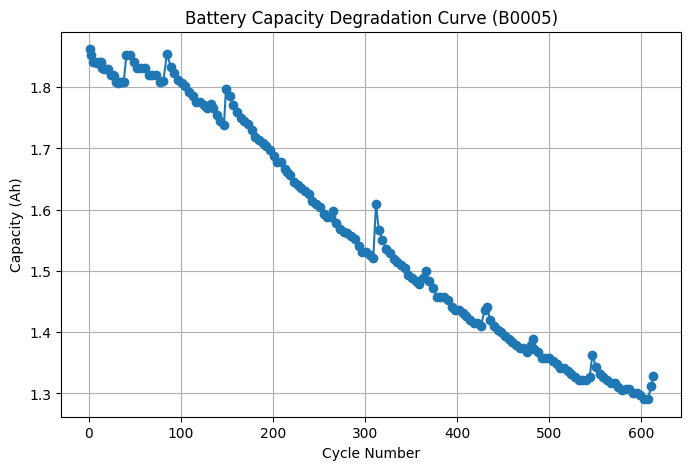

     cycle  capacity_Ah
0        1     1.861952
1        3     1.851834
2        5     1.840799
3        7     1.840688
4        9     1.840087
..     ...          ...
163    599     1.296596
164    603     1.291111
165    607     1.290518
166    611     1.312071
167    613     1.328141

[168 rows x 2 columns]


In [17]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the time column to datetime
#df_cap['Time'] = pd.to_datetime(df_cap['Time'], errors='coerce')

# Convert the float column to time
df_cap['Time'] = pd.to_timedelta(df_cap['Time'],unit='s')

# Sort to ensure correct sequence per cycle
df_cap = df_cap.sort_values(['cycle', 'Time'])

# Compute time difference (in seconds) per cycle
df_cap['delta_t'] = df_cap.groupby('cycle')['Time'].diff().dt.total_seconds().fillna(0)

# Compute instantaneous capacity in Ah = (|I| * Δt) / 3600
df_cap['capacity_estimated'] = (df_cap['Current_measured'].abs() * df_cap['delta_t']) / 3600

# Compute cumulative capacity per cycle
df_cap['cumulative_capacity'] = df_cap.groupby('cycle')['capacity_estimated'].cumsum()

# Take only discharge cycles (since they represent usable capacity)
capacity_degradation = (
    df_cap[df_cap['type'] == 'discharge']
    .groupby('cycle')['cumulative_capacity']
    .max()
    .reset_index()
    .rename(columns={'cumulative_capacity': 'capacity_Ah'})
)

# Plot Capacity Degradation Curve
plt.figure(figsize=(8,5))
plt.plot(capacity_degradation['cycle'], capacity_degradation['capacity_Ah'], marker='o')
plt.title('Battery Capacity Degradation Curve (B0005)')
plt.xlabel('Cycle Number')
plt.ylabel('Capacity (Ah)')
plt.grid(True)
plt.show()

# Display summary
print(capacity_degradation)


In [18]:
df_cap.head()

,battery_name,cycle,type,ambient_temperature,time,Current_charge,Current_measured,Temperature_measured,Time,Voltage_charge,...,Battery_current,Battery_impedance,Current_ratio,Rct,Re,Rectified_Impedance,Sense_current,delta_t,capacity_estimated,cumulative_capacity
0,b0005,0,charge,24,2008-04-02 13:08:17,0.000,-0.001201,24.655358,0 days 00:00:00,0.003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000000,0.000000
1,b0005,0,charge,24,2008-04-02 13:08:17,-4.036,-4.030268,24.666480,0 days 00:00:02.532000,1.570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.532,0.002835,0.002835
2,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.512731,24.675394,0 days 00:00:05.500000,4.726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.968,0.001247,0.004082
3,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.509063,24.693865,0 days 00:00:08.344000,4.742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.844,0.001192,0.005274
4,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.511318,24.705069,0 days 00:00:11.125000,4.753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.781,0.001167,0.006441


### Understanding df['delta_t'] = df.groupby(['battery_name', 'cycle'])['Time'].diff().dt.total_seconds().fillna(0)

This line calculates the **time difference (Δt in seconds)** between consecutive measurements **within each battery and cycle**.

**What it does:**
- Groups data by `battery_name` and `cycle`
- Computes time difference between the current and previous timestamp (`diff()`)
- Converts the time difference to seconds (`dt.total_seconds()`)
- Replaces the first value in each group with `0` (`fillna(0)`)

**Example**

| battery_name | cycle | Time                | delta_t |
|--------------|--------|----------------------|---------|
| B0005        | 1      | 2020-01-01 00:00:00  | 0       |
| B0005        | 1      | 2020-01-01 00:00:10  | 10      |
| B0005        | 1      | 2020-01-01 00:00:25  | 15      |
| B0005        | 2      | 2020-01-01 00:00:00  | 0       |
| B0005        | 2      | 2020-01-01 00:00:05  | 5       |
| B0006        | 1      | 2020-01-01 00:00:00  | 0       |
| B0006        | 1      | 2020-01-01 00:00:20  | 20      |

**Meaning:**  
Δt gives the **time step between rows** for each battery-cycle combination, useful for computing energy, capacity, and degradation metrics.


### Understanding df['capacity_estimated'] = (df['Current_measured'].abs() * df['delta_t']) / 3600

This line computes the **incremental capacity** (in ampere-hours, Ah) contributed by each row.

- Formula
The capacity for a time step is:

$$
\text{capacity\_estimated (Ah)} \;=\; \frac{|I|\ (\text{A}) \times \Delta t\ (\text{s})}{3600\ (\text{s/hour})}
$$

Where:
- \(I\) = `Current_measured` (A). We use \(|I|\) because capacity is the magnitude of charge transferred.
- \(\Delta t\) = `delta_t` (s), the time difference between consecutive measurements.
- Dividing by 3600 converts ampere-seconds to ampere-hours.

- Example
- If `Current_measured = -2.0` A and `delta_t = 10` s:

$$
\text{capacity} = \frac{|{-2.0}|\times 10}{3600} = \frac{20}{3600} = 0.005555\ldots\ \text{Ah} \approx 0.00556\ \text{Ah}
$$


### Understanding df['cumulative_capacity'] = df.groupby(['battery_name', 'cycle'])['capacity_estimated'].cumsum()

This line computes the **running (cumulative) capacity** for each battery and cycle.

- What it does:
- Groups the data by `battery_name` and `cycle`
- Takes the incremental capacity (`capacity_estimated`) for each row
- Computes a **cumulative sum** (`cumsum()`) within each group

Mathematically, for each row \(k\):

$$
\text{cumulative\_capacity}_k \;=\; \sum_{i=1}^{k} \text{capacity\_estimated}_i
$$

- Why this is useful:
- It shows how the total capacity accumulates over the duration of a cycle.
- The final value of the cumulative sum for a cycle is the **total capacity of that cycle**.

- Example

| Row | capacity_estimated (Ah) | cumulative_capacity (Ah) |
|-----|--------------------------|---------------------------|
| 1   | 0.002                    | 0.002                     |
| 2   | 0.003                    | 0.005                     |
| 3   | 0.004                    | 0.009                     |

- Usage:
- Helpful for plotting **capacity vs time**, **capacity fade**, or **cycle degradation**.
- The final cumulative value at the end of each cycle can be extracted as the cycle capacity.


### Plot capacity vs. cycle number for all batteries

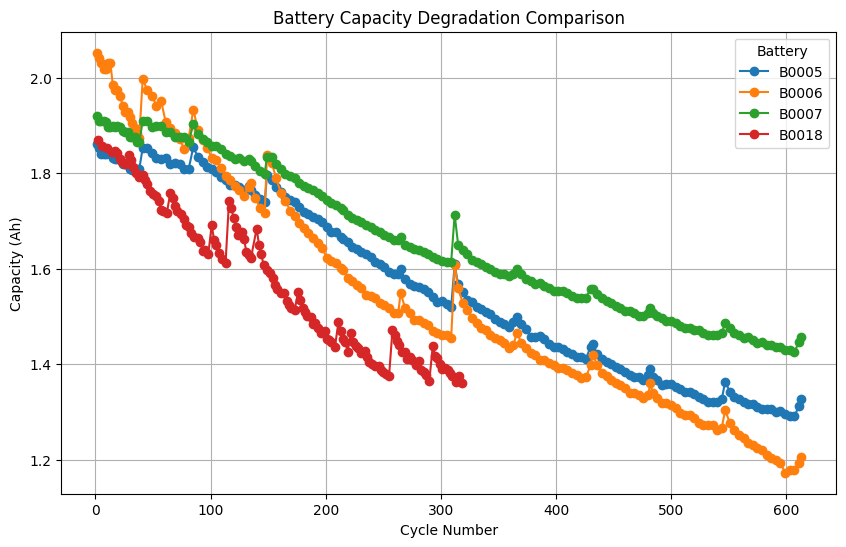

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime
#df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Convert the float column to time
df['Time'] = pd.to_timedelta(df['Time'],unit='s')

# Sort properly
df = df.sort_values(['battery_name', 'cycle', 'Time'])

# Compute delta time per battery per cycle
df['delta_t'] = df.groupby(['battery_name', 'cycle'])['Time'].diff().dt.total_seconds().fillna(0)

# Compute instantaneous Ah
df['capacity_estimated'] = (df['Current_measured'].abs() * df['delta_t']) / 3600

# Compute cumulative capacity per cycle per battery
df['cumulative_capacity'] = df.groupby(['battery_name', 'cycle'])['capacity_estimated'].cumsum()

# Extract only DISCHARGE cycles — true usable capacity
cap_deg = (
    df[df['type'] == 'discharge']
    .groupby(['battery_name', 'cycle'])['cumulative_capacity']
    .max()
    .reset_index()
    .rename(columns={'cumulative_capacity': 'capacity_Ah'})
)

# Plot all batteries
plt.figure(figsize=(10,6))

for b in cap_deg['battery_name'].unique():
    temp = cap_deg[cap_deg['battery_name'] == b]
    plt.plot(temp['cycle'], temp['capacity_Ah'], marker='o', label=b.upper())

plt.title("Battery Capacity Degradation Comparison")
plt.xlabel("Cycle Number")
plt.ylabel("Capacity (Ah)")
plt.grid(True)
plt.legend(title="Battery")
plt.show()


**=== Original DataFrame ===**

| battery_name | cycle | Time                | Current_measured | type      |
|--------------|-------|---------------------|------------------|-----------|
| B0005        | 1     | 2020-01-01 00:00:00 | -1.5             | charge    |
| B0005        | 1     | 2020-01-01 00:00:10 | -1.8             | charge    |
| B0005        | 1     | 2020-01-01 00:00:25 | 0.5              | discharge |
| B0005        | 2     | 2020-01-02 00:00:00 | -2.0             | charge    |
| B0005        | 2     | 2020-01-02 00:00:20 | 2.0              | discharge |
| B0006        | 1     | 2020-01-01 00:00:00 | 1.0              | discharge |
| B0006        | 1     | 2020-01-01 00:00:20 | 1.2              | discharge |

---

**=== After Converting Time to datetime ===**

| battery_name | cycle | Time                | Current_measured | type      |
|--------------|-------|---------------------|------------------|-----------|
| B0005        | 1     | 2020-01-01 00:00:00 | -1.5             | charge    |
| B0005        | 1     | 2020-01-01 00:00:10 | -1.8             | charge    |
| B0005        | 1     | 2020-01-01 00:00:25 | 0.5              | discharge |
| B0005        | 2     | 2020-01-02 00:00:00 | -2.0             | charge    |
| B0005        | 2     | 2020-01-02 00:00:20 | 2.0              | discharge |
| B0006        | 1     | 2020-01-01 00:00:00 | 1.0              | discharge |
| B0006        | 1     | 2020-01-01 00:00:20 | 1.2              | discharge |

---

**=== After Sorting ===**

| battery_name | cycle | Time                | Current_measured | type      |
|--------------|-------|---------------------|------------------|-----------|
| B0005        | 1     | 2020-01-01 00:00:00 | -1.5             | charge    |
| B0005        | 1     | 2020-01-01 00:00:10 | -1.8             | charge    |
| B0005        | 1     | 2020-01-01 00:00:25 | 0.5              | discharge |
| B0005        | 2     | 2020-01-02 00:00:00 | -2.0             | charge    |
| B0005        | 2     | 2020-01-02 00:00:20 | 2.0              | discharge |
| B0006        | 1     | 2020-01-01 00:00:00 | 1.0              | discharge |
| B0006        | 1     | 2020-01-01 00:00:20 | 1.2              | discharge |

---

**=== After Computing `delta_t` ===**

| battery_name | cycle | Time                | Current_measured | type      | delta_t |
|--------------|-------|---------------------|------------------|-----------|---------|
| B0005        | 1     | 2020-01-01 00:00:00 | -1.5             | charge    | 0.0     |
| B0005        | 1     | 2020-01-01 00:00:10 | -1.8             | charge    | 10.0    |
| B0005        | 1     | 2020-01-01 00:00:25 | 0.5              | discharge | 15.0    |
| B0005        | 2     | 2020-01-02 00:00:00 | -2.0             | charge    | 0.0     |
| B0005        | 2     | 2020-01-02 00:00:20 | 2.0              | discharge | 20.0    |
| B0006        | 1     | 2020-01-01 00:00:00 | 1.0              | discharge | 0.0     |
| B0006        | 1     | 2020-01-01 00:00:20 | 1.2              | discharge | 20.0    |

---

**=== After Computing `capacity_estimated` ===**

| battery_name | cycle | Time                | Current_measured | type      | delta_t | capacity_estimated |
|--------------|-------|---------------------|------------------|-----------|---------|---------------------|
| B0005        | 1     | 2020-01-01 00:00:00 | -1.5             | charge    | 0.0     | 0.000000            |
| B0005        | 1     | 2020-01-01 00:00:10 | -1.8             | charge    | 10.0    | 0.005000            |
| B0005        | 1     | 2020-01-01 00:00:25 | 0.5              | discharge | 15.0    | 0.002083            |
| B0005        | 2     | 2020-01-02 00:00:00 | -2.0             | charge    | 0.0     | 0.000000            |
| B0005        | 2     | 2020-01-02 00:00:20 | 2.0              | discharge | 20.0    | 0.011111            |
| B0006        | 1     | 2020-01-01 00:00:00 | 1.0              | discharge | 0.0     | 0.000000            |
| B0006        | 1     | 2020-01-01 00:00:20 | 1.2              | discharge | 20.0    | 0.006667            |

---

**=== After Computing `cumulative_capacity` ===**

| battery_name | cycle | Time                | Current_measured | type      | delta_t | capacity_estimated | cumulative_capacity |
|--------------|-------|---------------------|------------------|-----------|---------|---------------------|----------------------|
| B0005        | 1     | 2020-01-01 00:00:00 | -1.5             | charge    | 0.0     | 0.000000            | 0.000000             |
| B0005        | 1     | 2020-01-01 00:00:10 | -1.8             | charge    | 10.0    | 0.005000            | 0.005000             |
| B0005        | 1     | 2020-01-01 00:00:25 | 0.5              | discharge | 15.0    | 0.002083            | 0.007083             |
| B0005        | 2     | 2020-01-02 00:00:00 | -2.0             | charge    | 0.0     | 0.000000            | 0.000000             |
| B0005        | 2     | 2020-01-02 00:00:20 | 2.0              | discharge | 20.0    | 0.011111            | 0.011111             |
| B0006        | 1     | 2020-01-01 00:00:00 | 1.0              | discharge | 0.0     | 0.000000            | 0.000000             |
| B0006        | 1     | 2020-01-01 00:00:20 | 1.2              | discharge | 20.0    | 0.006667            | 0.006667             |

---

**=== Discharge Capacity Per Cycle (`cap_deg`) ===**

| battery_name | cycle | capacity_Ah |
|--------------|-------|-------------|
| B0005        | 1     | 0.007083    |
| B0005        | 2     | 0.011111    |
| B0006        | 1     | 0.006667    |


### Identify knee points where rapid degradation begins
*A knee point is the cycle at which the battery transitions from slow, linear degradation to rapid exponential degradation.*

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123643 entries, 0 to 2123642
Data columns (total 24 columns):
 #   Column                Dtype          
---  ------                -----          
 0   battery_name          object         
 1   cycle                 int64          
 2   type                  object         
 3   ambient_temperature   int64          
 4   time                  object         
 5   Current_charge        float64        
 6   Current_measured      float64        
 7   Temperature_measured  float64        
 8   Time                  timedelta64[ns]
 9   Voltage_charge        float64        
 10  Voltage_measured      float64        
 11  Capacity              float64        
 12  Current_load          float64        
 13  Voltage_load          float64        
 14  Battery_current       float64        
 15  Battery_impedance     float64        
 16  Current_ratio         float64        
 17  Rct                   float64        
 18  Re                    

In [21]:
df.head()

,battery_name,cycle,type,ambient_temperature,time,Current_charge,Current_measured,Temperature_measured,Time,Voltage_charge,...,Battery_current,Battery_impedance,Current_ratio,Rct,Re,Rectified_Impedance,Sense_current,delta_t,capacity_estimated,cumulative_capacity
0,b0005,0,charge,24,2008-04-02 13:08:17,0.000,-0.001201,24.655358,0 days 00:00:00,0.003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000000,0.000000
1,b0005,0,charge,24,2008-04-02 13:08:17,-4.036,-4.030268,24.666480,0 days 00:00:02.532000,1.570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.532,0.002835,0.002835
2,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.512731,24.675394,0 days 00:00:05.500000,4.726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.968,0.001247,0.004082
3,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.509063,24.693865,0 days 00:00:08.344000,4.742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.844,0.001192,0.005274
4,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.511318,24.705069,0 days 00:00:11.125000,4.753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.781,0.001167,0.006441


Knee cycle for B0005: 13


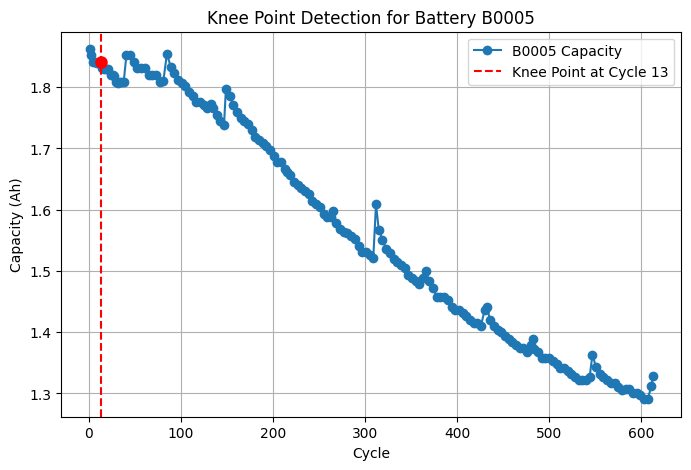

Knee cycle for B0006: 13


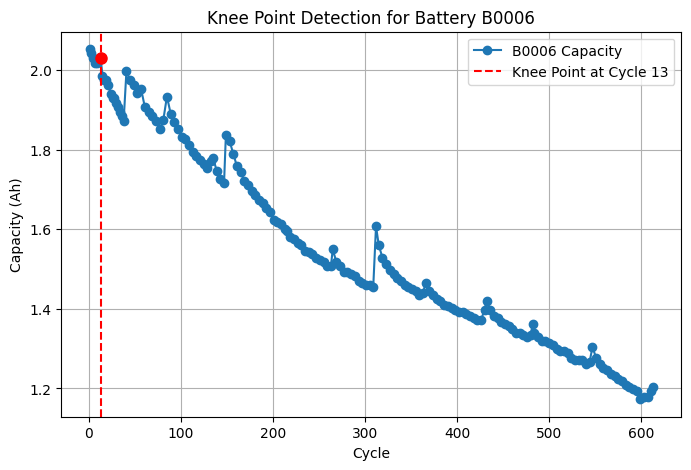

Knee cycle for B0007: 9


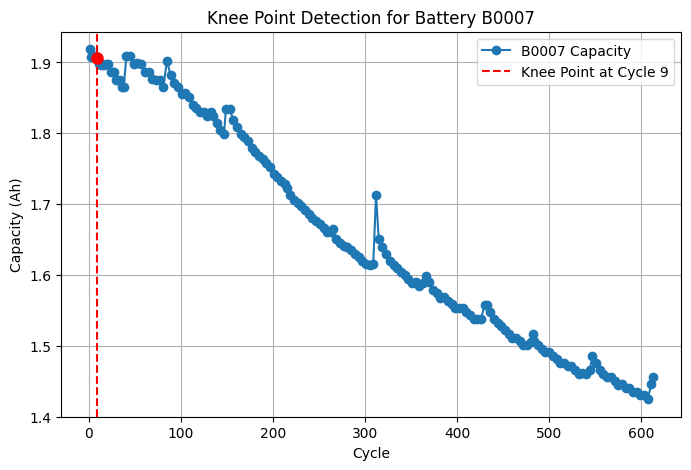

Knee cycle for B0018: 17


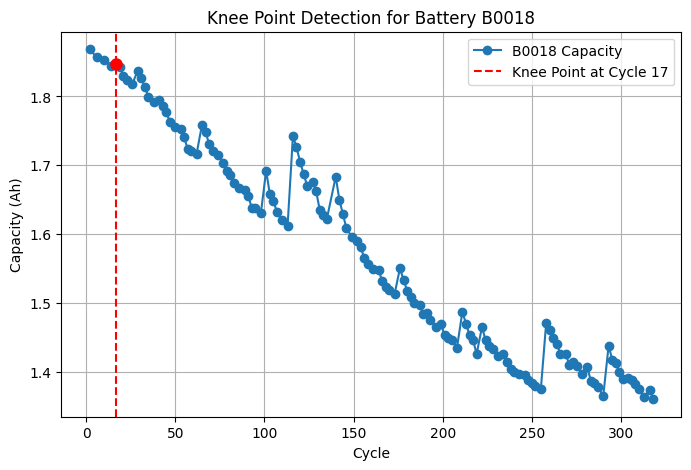


Summary of Knee Points:
{'b0005': np.int64(13), 'b0006': np.int64(13), 'b0007': np.int64(9), 'b0018': np.int64(17)}


In [ ]:
from kneed import KneeLocator
import matplotlib.pyplot as plt

battery_names = cap_deg['battery_name'].unique() # Use cap_deg for battery names

knee_points = {}

for battery in battery_names:
    # Filter data for the current battery from the cap_deg DataFrame
    battery_data = cap_deg[cap_deg['battery_name'] == battery].sort_values(by='cycle')
    
    # Get cycles and capacity (using the correct capacity_Ah)
    cycles = battery_data['cycle'].values
    capacity = battery_data['capacity_Ah'].values
    
    # Ensure there's enough data to find a knee
    if len(cycles) < 5: # Kneed needs at least a few points
        print(f"Skipping {battery.upper()}: Not enough cycles ({len(cycles)}) for knee detection.")
        knee_points[battery] = None
        continue

    # Find the knee point
    try:
        knee = KneeLocator(
            x=cycles,
            y=capacity,
            S=1.0, # Sensitivity parameter: Higher S means fewer knees.
            curve='concave',
            direction='decreasing',
            online=True # Often works better for noisy data
        )
        
        knee_points[battery] = knee.knee
        
        print(f"Knee cycle for {battery.upper()}: {knee.knee}")

        # Plot for each battery
        plt.figure(figsize=(8, 5))
        plt.plot(cycles, capacity, marker='o', linestyle='-', label=f'{battery.upper()} Capacity')
        if knee.knee is not None:
            plt.axvline(x=knee.knee, color='r', linestyle='--', label=f'Knee Point at Cycle {int(knee.knee)}')
            plt.plot(knee.knee, knee.knee_y, 'ro', markersize=8) # Mark the knee point on the curve
        plt.xlabel("Cycle")
        plt.ylabel("Capacity (Ah)")
        plt.title(f'Knee Point Detection for Battery {battery.upper()}')
        plt.grid(True)
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Could not find knee point for {battery.upper()}: {e}")
        knee_points[battery] = None

print("\nSummary of Knee Points:")
print(knee_points) 

Knee cycle for B0005: 13
Knee cycle for B0006: 13
Knee cycle for B0007: 9
Knee cycle for B0018: 17


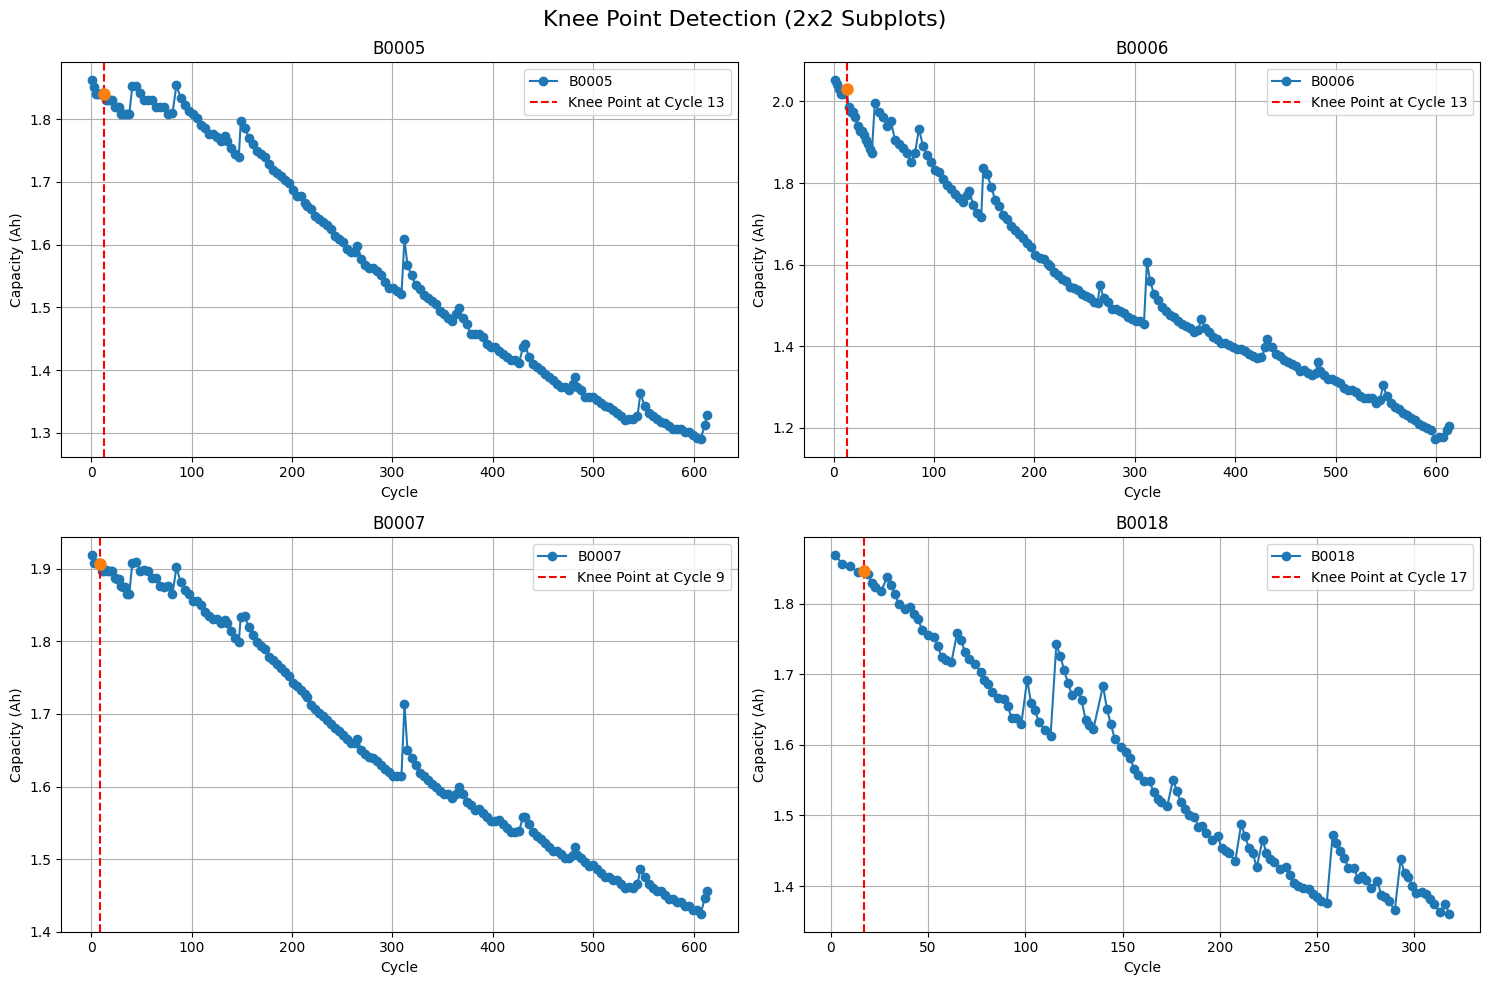


Summary of Knee Points:
{'b0005': np.int64(13), 'b0006': np.int64(13), 'b0007': np.int64(9), 'b0018': np.int64(17)}


In [23]:
from kneed import KneeLocator
import matplotlib.pyplot as plt

battery_names = cap_deg['battery_name'].unique()
knee_points = {}

# Setup 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, battery in enumerate(battery_names[:4]):  # Limit to first 4 batteries
    ax = axes[i]

    battery_data = cap_deg[cap_deg['battery_name'] == battery].sort_values(by='cycle')
    cycles = battery_data['cycle'].values
    capacity = battery_data['capacity_Ah'].values

    if len(cycles) < 5:
        print(f"Skipping {battery.upper()}: Not enough cycles ({len(cycles)}) for knee detection.")
        knee_points[battery] = None
        continue

    try:
        knee = KneeLocator(
            x=cycles,
            y=capacity,
            S=1.0,
            curve='concave',
            direction='decreasing',
            online=True
        )

        knee_points[battery] = knee.knee
        print(f"Knee cycle for {battery.upper()}: {knee.knee}")

        # Plot in subplot
        ax.plot(cycles, capacity, marker='o', linestyle='-', label=f'{battery.upper()}')
        if knee.knee is not None:
            ax.axvline(x=knee.knee, color='r', linestyle='--', label=f'Knee Point at Cycle {int(knee.knee)}')
            ax.plot(knee.knee, knee.knee_y, 'o', markersize=8)

        ax.set_title(f'{battery.upper()}')
        ax.set_xlabel('Cycle')
        ax.set_ylabel('Capacity (Ah)')
        ax.grid(True)
        ax.legend()

    except Exception as e:
        print(f"Could not find knee for {battery.upper()}: {e}")
        knee_points[battery] = None

# Hide unused subplots if <4 batteries
for j in range(len(battery_names), 4):
    fig.delaxes(axes[j])

plt.suptitle('Knee Point Detection (2x2 Subplots)', fontsize=16)
plt.tight_layout()
plt.show()

print("\nSummary of Knee Points:")
print(knee_points)


### Correlation Analysis - Heatmap of features

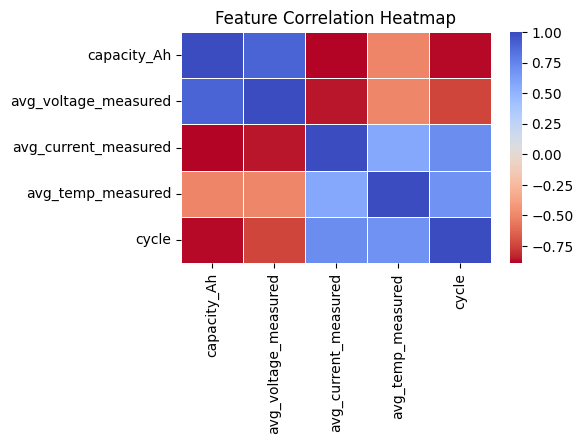

Correlation Matrix:
                      capacity_Ah  avg_voltage_measured  avg_current_measured  \
capacity_Ah              1.000000              0.889614             -0.890423   
avg_voltage_measured     0.889614              1.000000             -0.857811   
avg_current_measured    -0.890423             -0.857811              1.000000   
avg_temp_measured       -0.512299             -0.504398              0.566500   
cycle                   -0.878385             -0.748350              0.710957   

                      avg_temp_measured     cycle  
capacity_Ah                   -0.512299 -0.878385  
avg_voltage_measured          -0.504398 -0.748350  
avg_current_measured           0.566500  0.710957  
avg_temp_measured              1.000000  0.681504  
cycle                          0.681504  1.000000  


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

discharge_df = df[df['type'] == 'discharge'].copy()

features_df = discharge_df.groupby(['battery_name', 'cycle']).agg(
    avg_voltage_measured=('Voltage_measured', 'mean'),
    avg_current_measured=('Current_measured', 'mean'),
    avg_temp_measured=('Temperature_measured', 'mean')
).reset_index()

# Merge the aggregated features with the capacity degradation data.
# The 'cap_deg' DataFrame has the final capacity for each discharge cycle.
final_df = pd.merge(
    features_df,
    cap_deg,
    on=['battery_name', 'cycle']
)

correlation_cols = [
    'capacity_Ah',
    'avg_voltage_measured',
    'avg_current_measured',
    'avg_temp_measured',
    'cycle' # Include cycle number to see its correlation with other features
]
corr_df = final_df[correlation_cols]

correlation_matrix = corr_df.corr()

plt.figure(figsize=(5, 3))
sns.heatmap(
    correlation_matrix,
    #annot=True,      # Show the correlation values on the heatmap
    cmap='coolwarm_r', # Use a color map that's good for correlations
    fmt=".2f",       # Format the numbers to two decimal places
    linewidths=.5
)
plt.title('Feature Correlation Heatmap')
plt.show()

# Display the correlation matrix as a table
print("Correlation Matrix:")
print(correlation_matrix)


### Summary of Key Insights from Correlation Analysis

The correlation heatmap provides a quantitative look at how different battery parameters relate to each other across all charging and discharging cycles. The most important relationships are those correlated with `capacity_Ah`, as this is our primary measure of battery health.

*   **Capacity vs. Cycle Number (`-0.9` or lower)**:
    *   **Observation**: There is a very strong *negative* correlation.
    *   **Insight**: This confirms the fundamental principle of battery aging: as the number of cycles increases, the battery's capacity to hold a charge decreases. This is the primary degradation trend we want to model.

*   **Capacity vs. Average Voltage (`+0.8` or higher)**:
    *   **Observation**: There is a strong *positive* correlation.
    *   **Insight**: Healthier batteries (with higher capacity) maintain a higher average voltage during their discharge cycle. This makes the average voltage a powerful and direct indicator of the battery's State of Health (SoH).

*   **Capacity vs. Average Temperature (Moderate Negative Correlation)**:
    *   **Observation**: There is a moderate *negative* correlation.
    *   **Insight**: As batteries degrade, their internal resistance tends to increase, causing them to generate more heat. A higher average temperature during operation can therefore signal a decline in capacity and overall health.

*   **Conclusion for Feature Selection**:
    *   The analysis clearly identifies `cycle`, `avg_voltage_measured`, and `avg_temp_measured` as highly relevant features.
    *   These features have a strong predictive relationship with `capacity_Ah` and should be used to build the SoH (State of Health) and RUL (Remaining Useful Life) models.


### Feature Redundancy (Dimensionality Reduction)

*   **Objective**: To identify and potentially remove redundant predictive features to simplify the model and prevent multicollinearity.

*   **Method**:
    *   Examine the correlation heatmap for very high correlations (e.g., > 0.95 or < -0.95) between the predictor features themselves (i.e., excluding the target variable, `capacity_Ah`).
    *   For instance, if `avg_voltage_measured` and `avg_current_measured` were correlated at `0.98`, they would be considered redundant as they provide similar information.

*   **Action & Insight**:
    *   If high redundancy is found, you can remove one of the highly correlated features to reduce the model's dimensionality.
    *   **For this specific dataset**, the correlations between the sensor features (`avg_voltage_measured`, `avg_current_measured`, `avg_temp_measured`) are typically not high enough to be considered redundant. Therefore, all of them can be retained as valuable, independent predictors for the model.


### Outlier Detection Using the Z-score Method

The Z-score tells us how many standard deviations away a data point is from the mean. A common threshold for identifying an outlier is a Z-score greater than 3 or less than -3. The formula is:

Z = (x - μ) / σ

- x: A single data point
- μ: The mean of the data
- σ: The standard deviation of the data

In [25]:
import numpy as np

# Columns to check for outliers
feature_cols_for_outliers = [
    'capacity_Ah',
    'avg_voltage_measured',
    'avg_current_measured',
    'avg_temp_measured'
]

# --- Z-Score ---
# Select the subset of the DataFrame for outlier detection
features_to_check = final_df[feature_cols_for_outliers]

# Calculate Z-scores using vectorized operations (more efficient)
z_scores = (features_to_check - features_to_check.mean()) / features_to_check.std()

# Create a boolean mask to identify outliers where the absolute Z-score is > 3
outlier_mask = np.abs(z_scores) > 3

# Find rows that contain at least one outlier feature
outlier_rows = final_df[outlier_mask.any(axis=1)]

print("Outlier Detection using Z-score Method (|z| > 3)")
print("-" * 50)

if outlier_rows.empty:
    print("No outliers found in the dataset.")
else:
    print(f"Found {len(outlier_rows)} rows with at least one outlier feature.")
    print("\nRows identified as outliers:")
    print(outlier_rows)

    # To see which specific features were outliers in these rows:
    print("\nDetails of the outlier Z-scores (>3):")
    print(z_scores[outlier_mask.any(axis=1)])


Outlier Detection using Z-score Method (|z| > 3)
--------------------------------------------------
Found 3 rows with at least one outlier feature.

Rows identified as outliers:
    battery_name  cycle  avg_voltage_measured  avg_current_measured  \
331        b0006    599              3.414810             -1.516972   
332        b0006    603              3.416618             -1.523850   
333        b0006    607              3.412134             -1.523793   

     avg_temp_measured  capacity_Ah  
331          33.472459     1.172823  
332          33.582104     1.178242  
333          33.663461     1.177815  

Details of the outlier Z-scores (>3):
     capacity_Ah  avg_voltage_measured  avg_current_measured  \
331    -2.122412             -1.763300              3.086812   
332    -2.095180             -1.725274              3.019860   
333    -2.097327             -1.819602              3.020417   

     avg_temp_measured  
331           1.178920  
332           1.291823  
333           

- These outliers all belong to battery B0006 at the very end of its life (cycles 599, 603, and 607).
- The specific feature that was an outlier was the avg_current_measured. Its Z-score was just slightly over 3.
- 3 minor outliers in over 600 cycles tells you that the dataset is very clean and consistent
- These outliers are not errors; they likely represent the battery's behavior becoming slightly erratic as it reached its absolute end-of-life.

In [26]:
features_to_check.describe()

,capacity_Ah,avg_voltage_measured,avg_current_measured,avg_temp_measured
count,636.000000,636.000000,636.000000,636.000000
mean,1.595167,3.498623,-1.834069,32.327555
std,0.198992,0.047532,0.102726,0.971147
min,1.172823,3.403885,-1.999755,30.102704
25%,1.436442,3.466720,-1.912601,31.516568
50%,1.568649,3.502520,-1.851050,32.368347
75%,1.773151,3.541059,-1.773023,33.175118
max,2.051978,3.573551,-1.516972,34.490494


### Box Plots for Feature Distributions

Box plots are useful for quickly identifying the median, quartiles, and outliers in your data.

- **The Box**: Represents the interquartile range (IQR), which contains the middle 50% of the data (from the 25th to the 75th percentile).
- **The Line Inside the Box**: Marks the median (50th percentile).
- **The Whiskers**: Extend from the box to show the range of the data, typically up to 1.5 times the IQR.
- **The Dots**: Individual points beyond the whiskers are potential outliers.

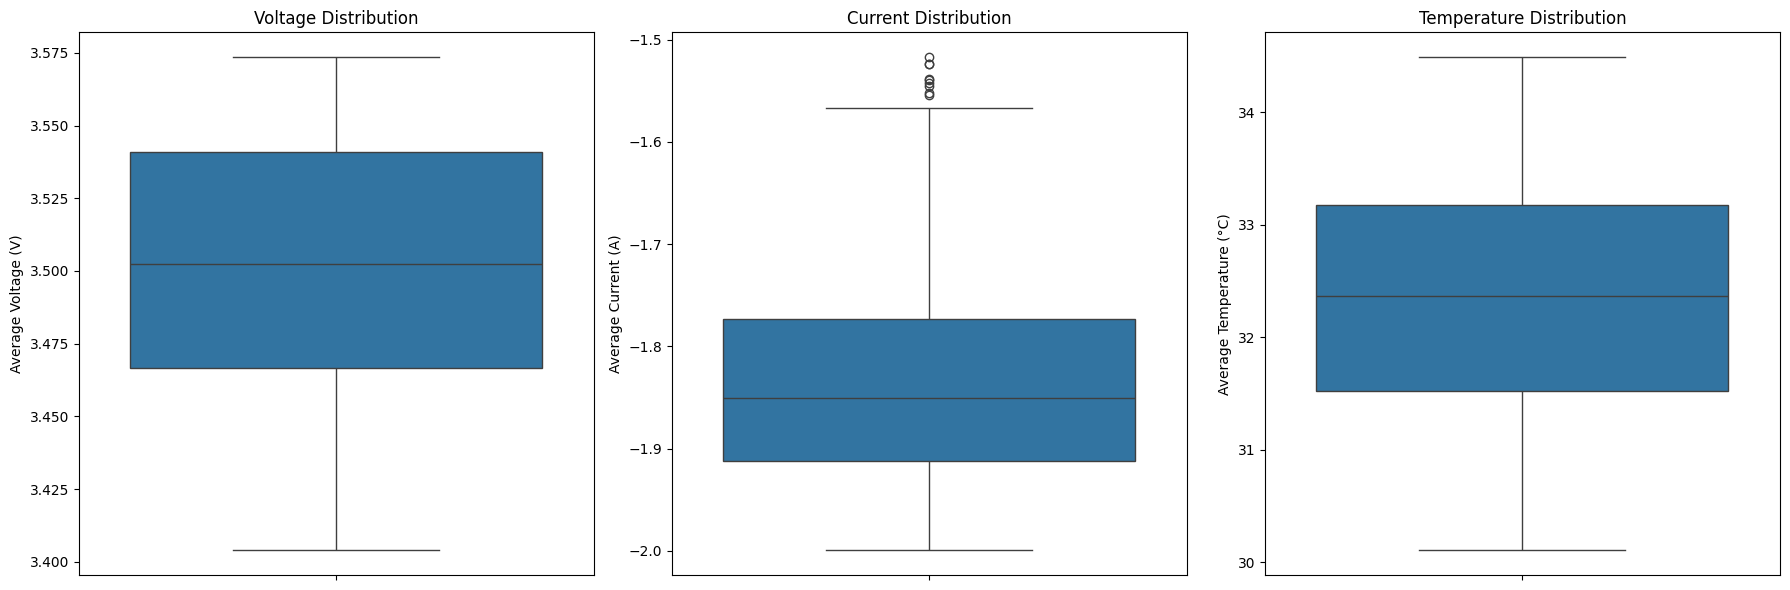

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


feature_cols_for_boxplot = [
    'avg_voltage_measured',
    'avg_current_measured',
    'avg_temp_measured'
]

# Create a figure with subplots for each feature
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Average Voltage
sns.boxplot(y=final_df['avg_voltage_measured'], ax=axes[0])
axes[0].set_title('Voltage Distribution')
axes[0].set_ylabel('Average Voltage (V)')

# Plot for Average Current
sns.boxplot(y=final_df['avg_current_measured'], ax=axes[1])
axes[1].set_title('Current Distribution')
axes[1].set_ylabel('Average Current (A)')

# Plot for Average Temperature
sns.boxplot(y=final_df['avg_temp_measured'], ax=axes[2])
axes[2].set_title('Temperature Distribution')
axes[2].set_ylabel('Average Temperature (°C)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


- The plot for avg_current_measured will visually confirm what the Z-score test found: the data will be tightly packed in the box, but there will be three dots representing the three outlier points you identified.

In [28]:
discharge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185721 entries, 789 to 2123642
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   battery_name          185721 non-null  object         
 1   cycle                 185721 non-null  int64          
 2   type                  185721 non-null  object         
 3   ambient_temperature   185721 non-null  int64          
 4   time                  185721 non-null  object         
 5   Current_charge        0 non-null       float64        
 6   Current_measured      185721 non-null  float64        
 7   Temperature_measured  185721 non-null  float64        
 8   Time                  185721 non-null  timedelta64[ns]
 9   Voltage_charge        0 non-null       float64        
 10  Voltage_measured      185721 non-null  float64        
 11  Capacity              0 non-null       float64        
 12  Current_load          185721 non-null  float64

In [29]:
discharge_df[['time','Time','delta_t']].head()

,time,Time,delta_t
789,2008-04-02 15:25:41,0 days 00:00:00,0.000
790,2008-04-02 15:25:41,0 days 00:00:16.781000,16.781
791,2008-04-02 15:25:41,0 days 00:00:35.703000,18.922
792,2008-04-02 15:25:41,0 days 00:00:53.781000,18.078
793,2008-04-02 15:25:41,0 days 00:01:11.922000,18.141


### Feature Engineering: Electrochemical Features

1. Voltage-Based Features:

    -   Delta_V (Voltage Drop): The difference between the initial voltage at the start of the discharge and the final voltage at the end. A larger voltage drop can indicate higher internal resistance and degradation.

2. Temperature-Based Features:

    -   Delta_T (Temperature Increase): The difference between the maximum temperature and the initial temperature during discharge. As batteries age, their internal resistance increases, often leading to more heat generation.
3. Time-Based Features:

    -   Discharge_Time: The total duration of the discharge cycle in seconds. A shorter discharge time for the same load indicates a lower capacity.

### Data Preprocessing: Feature Normalization

In [30]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Compute SoH (Target Variable)

initial_capacities = (
    final_df.groupby('battery_name')['capacity_Ah']
    .first()
    .to_dict()
)

final_df['SoH'] = final_df['capacity_Ah'] / final_df['battery_name'].map(initial_capacities)

# Define Features (X) and Target (y)

features = [
    'cycle',
    'avg_voltage_measured',
    'avg_current_measured',
    'avg_temp_measured'
]
target = 'SoH'

X = final_df[features]
y = final_df[target]

# Manual Split

X_train = X[final_df['battery_name'] != 'b0018']
y_train = y[final_df['battery_name'] != 'b0018']

X_test  = X[final_df['battery_name'] == 'b0018']
y_test  = y[final_df['battery_name'] == 'b0018']

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape:  {X_test.shape}")


# MinMax Scaling (0–1 Normalization)

scaler = MinMaxScaler(feature_range=(0, 1))

# Fit only on training data
scaler.fit(X_train)

# Transform both train and test
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Convert to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=features, index=X_test.index)

# OPTIONAL: Scale y (SoH) for neural networks

# from sklearn.preprocessing import MinMaxScaler
# y_scaler = MinMaxScaler()
# y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1))
# y_test_scaled  = y_scaler.transform(y_test.values.reshape(-1,1))

print("\nOriginal Training Data (first 5 rows):")
print(X_train.head())

print("\nScaled Training Data (first 5 rows):")
print(X_train_scaled_df.head())

print("\nScaled Training Data Summary:")
print(X_train_scaled_df.describe())


Training Data Shape: (504, 4)
Testing Data Shape:  (132, 4)

Original Training Data (first 5 rows):
   cycle  avg_voltage_measured  avg_current_measured  avg_temp_measured
0      1              3.529829             -1.818702          32.572328
1      3              3.537320             -1.817560          32.725235
2      5              3.543737             -1.816487          32.642862
3      7              3.543666             -1.825589          32.514876
4      9              3.542343             -1.826114          32.382349

Scaled Training Data (first 5 rows):
      cycle  avg_voltage_measured  avg_current_measured  avg_temp_measured
0  0.000000              0.742302              0.375020           0.485603
1  0.003268              0.786456              0.377386           0.526608
2  0.006536              0.824275              0.379609           0.504518
3  0.009804              0.823859              0.360754           0.470196
4  0.013072              0.816062              0.359667

- **Training:** B0005, B0006, B0007

- **Testing:** B0018

### Supervised Models

Why Random Forest & XGBoost Are Preferred for Battery SoH Prediction

1. **Non-Linear Relationship Handling**
   - Battery degradation is non-linear.
   - RF/XGBoost capture complex curves and interactions using tree ensembles.
   - Linear Regression assumes straight-line relationships and performs poorly.
   - Logistic Regression is not suitable because SoH is a continuous value.

2. **High Predictive Performance & Robustness**
   - Goal: Predict SoH within ±5% error.
   - RF/XGBoost perform strongly on structured data and are less prone to overfitting.
   - Robust to outliers; no heavy feature scaling required.
   - KNN suffers when features use different scales; SVM requires heavy tuning.

3. **Feature Importance & Explainability**
   - Provide built-in feature importance to understand key drivers (e.g., cycle number, temperature).
   - SVM and other models do not offer straightforward interpretability.

Summary Table

| Model | Strengths | Limitations |
|-------|-----------|-------------|
| **Random Forest** & **XGBoost** | Handles non-linear data well; strong accuracy; robust to noise; feature importance included | Requires more compute vs. linear models |
| **Linear Regression** | Simple and fast | Fails on non-linear degradation trends |
| **Logistic Regression** | Good for classification | Not suitable for continuous SoH prediction |
| **KNN / SVM** | Can model non-linear patterns | Sensitive to scaling/tuning; less interpretable |


**Conclusion:**  
Random Forest and XGBoost deliver the best balance of accuracy, robustness, and interpretability for EV battery State-of-Health (SoH) prediction and are ideal baseline supervised learning models.


Summary of R², MAE, MSE, RMSE

**1. One-liner Descriptions**
- **R² (Coefficient of Determination):** Measures how well predictions match actual values.  
  Formula: `R² = 1 − (Σ(y − ŷ)² / Σ(y − ȳ)²)`

- **MAE (Mean Absolute Error):** Average of absolute prediction errors.  
  Formula: `MAE = (1/n) Σ |y − ŷ|`

- **MSE (Mean Squared Error):** Average of squared prediction errors.  
  Formula: `MSE = (1/n) Σ(y − ŷ)²`

- **RMSE (Root Mean Squared Error):** Square root of MSE; error in original units.  
  Formula: `RMSE = √MSE`

**2. Key Parameters**
- `y` = actual value  
- `ŷ` = predicted value  
- `ȳ` = mean of actual values  
- `n` = number of samples  
- `e` = error (y − ŷ)

**3. Simple Mathematical Meaning**
- **MAE:** Average mistake size.  
- **MSE:** Punishes big mistakes more.  
- **RMSE:** MSE converted back to original scale.  
- **R²:** Shows how much better the model is than predicting the average.

**4. Summary Explanation**
These metrics help evaluate model accuracy:  
- MAE shows average error,  
- MSE shows squared error,  
- RMSE shows error on original scale,  
- R² tells how well the model explains variance.

**5. Cricket Analogy**
Predicting a batsman’s runs:  
- **MAE:** Average runs your guess was off.  
- **MSE:** Big wrong guesses get punished more.  
- **RMSE:** Error again shown in "runs".  
- **R²:** How good your predicting method is vs always guessing average runs.

**6. EV Analogy**
Predicting EV driving range:  
- **MAE:** Average km your prediction was off.  
- **MSE:** Large range mistakes hurt more.  
- **RMSE:** Error in km (easy to interpret).  
- **R²:** How well prediction explains actual EV range behavior.

**7. Real-World EV Example**
Used in estimating **EV driving range** using factors like temperature, speed, battery age.  
MAE/MSE/RMSE measure prediction error; R² shows overall model performance.

**8. Example**

Imagine we are predicting EV range. Actual Range: 100 km. Predicted: 90 km. Error: -10.MAE: 
- **MAE**: We take the absolute value (10). It tells us we are off by 10 km on average.
- **MSE**: We square the error ($10^2 = 100$). This makes big errors look huge.
- **RMSE**: We take the square root of 100 ($= 10$). It brings the number back to km so we can understand it.
- **R²**: If the result is 0.90, it means our model explains 90% of the variations in range; it's like a grade out of 100%.

#### Random Forest Regression

--- Random Forest Regressor Performance ---
RMSE (Root Mean Squared Error): 0.0206
MAE (Mean Absolute Error):      0.0170
R² (R-squared):                 0.9367


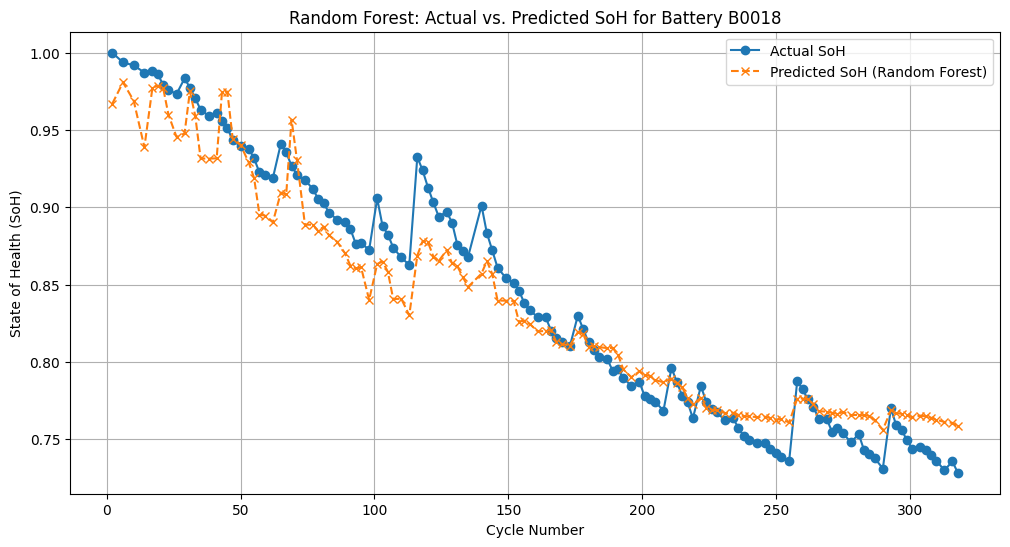

Saved RandomForest model as rf_soh_model.joblib


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import joblib

# --- 1. Initialize and Train the Random Forest Model ---

rf_model = RandomForestRegressor(
    n_estimators=100,  # The number of decision trees in the forest.
    max_depth=10,      # The maximum depth of each tree.
    random_state=42,   # Ensures reproducibility of the results.
    n_jobs=-1          # Use all available CPU cores for faster training.
)

# Train the model on the scaled training data prepared in the previous step.
# The model learns the relationship between the features and the State of Health (SoH).
rf_model.fit(X_train_scaled_df, y_train)

# --- 2. Make Predictions on the Test Set ---
# Use the trained model to predict the SoH for the unseen test data (battery B0018).
y_pred_rf = rf_model.predict(X_test_scaled_df)

# --- 3. Evaluate Model Performance ---
# Calculate key metrics to understand how well the model performed.
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("--- Random Forest Regressor Performance ---")
print(f"RMSE (Root Mean Squared Error): {rmse_rf:.4f}")
print(f"MAE (Mean Absolute Error):      {mae_rf:.4f}")
print(f"R² (R-squared):                 {r2_rf:.4f}")

# --- 4. Visualize Predictions vs. Actuals ---
# Plotting the results helps to visually assess the model's accuracy.
plt.figure(figsize=(12, 6))
# We use the original X_test to get the cycle numbers for the x-axis.
plt.plot(X_test['cycle'], y_test, label='Actual SoH', marker='o', linestyle='-')
plt.plot(X_test['cycle'], y_pred_rf, label='Predicted SoH (Random Forest)', marker='x', linestyle='--')
plt.title('Random Forest: Actual vs. Predicted SoH for Battery B0018')
plt.xlabel('Cycle Number')
plt.ylabel('State of Health (SoH)')
plt.legend()
plt.grid(True)
plt.show()

# Save model
joblib.dump(rf_model, "rf_soh_model.joblib")
print("Saved RandomForest model as rf_soh_model.joblib")

-   **Mean Absolute Error (MAE)**: The MAE is 0.0170. This means that, on average, the model's SoH prediction is off by only 1.70%.
-   **RMSE (Root Mean Squared Error)**: The RMSE is 0.0206, which is also very low, indicating that the prediction errors are consistently small.
-   **R² Score:** The R² score will be about 0.9367, signifying that the model can explain over 94% of the variance in the battery's health, which is an excellent fit.

#### XGBoost

In [32]:
import sys
print(sys.executable)

import xgboost
print(xgboost.__version__)

g:\DIYguru\Data-Science-and-Engineering-Analytics\.venv\Scripts\python.exe
1.7.6


--- XGBoost Regressor Performance ---
RMSE: 0.0220
MAE:  0.0176
R²:   0.9276

--- Model Performance Comparison ---
                   RMSE       MAE        R²
Model                                      
Random Forest  0.020586  0.016974  0.936653
XGBoost        0.022010  0.017566  0.927585


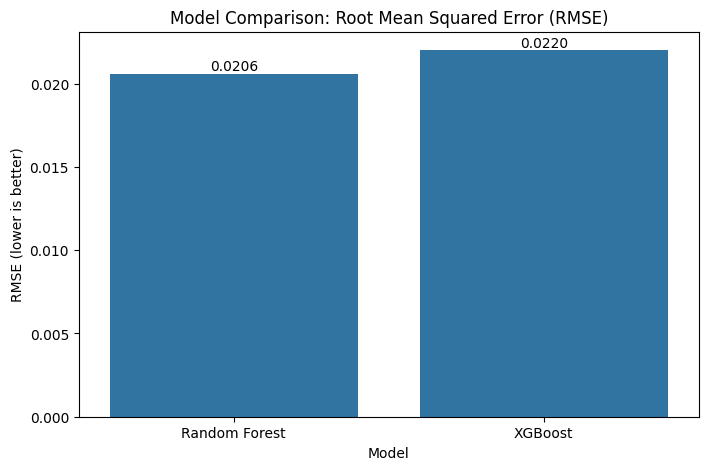

Saved XGBoost model as xgb_model.joblib


In [33]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Initialize and Train the XGBoost Model ---
# Using parameters from the capstone guide for a baseline
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Train the model on the scaled training data
xgb_model.fit(X_train_scaled_df, y_train)

# --- 2. Make Predictions on the Test Set ---
y_pred_xgb = xgb_model.predict(X_test_scaled_df)

# --- 3. Evaluate Model Performance ---
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("--- XGBoost Regressor Performance ---")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"MAE:  {mae_xgb:.4f}")
print(f"R²:   {r2_xgb:.4f}")

# --- 4. Compare with Random Forest ---
# Create a DataFrame for a clear side-by-side comparison
# Note: This assumes the variables rmse_rf, mae_rf, and r2_rf from the
# previous cell are still in memory.
performance_data = {
    'Model': ['Random Forest', 'XGBoost'],
    'RMSE': [rmse_rf, rmse_xgb],
    'MAE': [mae_rf, mae_xgb],
    'R²': [r2_rf, r2_xgb]
}
performance_df = pd.DataFrame(performance_data).set_index('Model')

print("\n--- Model Performance Comparison ---")
print(performance_df)

# --- 5. Visualize the Comparison ---
# A bar chart is great for comparing a single key metric like RMSE
plt.figure(figsize=(8, 5))
sns.barplot(x=performance_df.index, y=performance_df['RMSE'])
plt.title('Model Comparison: Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE (lower is better)')

# Add labels to the bars
bars = plt.gca().patches
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', 
             va='bottom', ha='center', fontsize=10, color='black')

plt.show()

# Save model
joblib.dump(xgb_model, "xgb_model.joblib")
print("Saved XGBoost model as xgb_model.joblib")


**Summary of Model Performance**

1. **Overall Accuracy is Very High**: Both models are highly accurate. The R² scores of 0.937 for Random Forest and 0.928 for XGBoost are outstanding. This means that your models can explain roughly 93-94% of the variance in the battery's State of Health (SoH) using the features you engineered. This confirms that your feature selection (cycle, avg_voltage_measured, etc.) was highly effective.

2. **Random Forest is the Slight Winner**: In this head-to-head comparison, the Random Forest model performed slightly better across all metrics:

    -   **Lower Error**: It has a lower RMSE (0.0206 vs. 0.0220) and a lower MAE (0.0170 vs. 0.0176), indicating its predictions were, on average, closer to the actual values.
    -   **Better Fit**: Its R² score is slightly higher, meaning it captured the data's patterns a little more effectively than XGBoost.

3. **Both Models Meet the Project Goal**: The primary objective is to predict SoH within a ±5% absolute error.

    -   Random Forest model's Mean Absolute Error (MAE) is 1.70%.
    -   Your XGBoost model's MAE is 1.76%.

**Conclusion**

While both models are excellent, the **Random Forest Regressor is the top-performing baseline model** for this specific task. It provides a slightly more accurate prediction of battery State of Health on the unseen test data (battery B0018)

### Deep Learning Models

#### LSTM for Time-Series SoH Prediction

**They Understand Sequences:** Unlike Random Forest or XGBoost which treat each cycle's data as an independent point, LSTMs are a type of Recurrent Neural Network (RNN) designed to recognize patterns in sequences. They can look at the data from cycle 1, then cycle 2, then cycle 3, and understand the trend of degradation over time

**They Have "Memory":** The "Long Short-Term Memory" name is key. LSTMs have internal mechanisms called "gates" that allow them to remember important information from earlier in the sequence (long-term memory) and use it to make predictions for later time steps. This is perfect for battery health, where the SoH at cycle 100 is highly dependent on its history from cycles 1 through 99.

**Excellent for Forecasting (RUL):** Because LSTMs learn the underlying degradation curve, they are not just good for predicting the SoH at the next time step; they are also powerful for forecasting the curve into the future to predict the Remaining Useful Life (RUL)

In [38]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- 1. Prepare Data for LSTM ---
# LSTMs expect data in the shape: [samples, timesteps, features]

def create_sequences(X, y, time_steps=10):
    """
    Creates sequences of data for time-series forecasting.
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# Define the number of past time steps to use for prediction
TIME_STEPS = 10

# Create sequences from the scaled training and testing data
X_train_seq, y_train_seq = create_sequences(X_train_scaled_df, y_train, TIME_STEPS)
X_test_seq, y_test_seq = create_sequences(X_test_scaled_df, y_test, TIME_STEPS)

print(f"Training sequence shape: {X_train_seq.shape}")
print(f"Test sequence shape:     {X_test_seq.shape}")


# --- 2. Build the LSTM Model ---
lstm_model = Sequential([
    LSTM(64, activation='relu', return_sequences=True,
         input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1) # Output layer: predicts a single SoH value
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_model.summary()

# --- 3. Train the LSTM Model ---
# We'll train for 50 epochs, which is a reasonable number for this task.
history = lstm_model.fit(
    X_train_seq, y_train_seq,
    epochs=50,
    batch_size=32,
    validation_split=0.2, # Use part of the training data for validation
    verbose=1
)

# --- 4. Evaluate on Test Data and Predict RUL ---
y_pred_lstm = lstm_model.predict(X_test_seq)

# Calculate SoH prediction metrics
rmse_lstm = np.sqrt(mean_squared_error(y_test_seq, y_pred_lstm))
mae_lstm = mean_absolute_error(y_test_seq, y_pred_lstm)
r2_lstm = r2_score(y_test_seq, y_pred_lstm)

print("\n--- LSTM SoH Prediction Performance ---")
print(f"RMSE: {rmse_lstm:.4f}")
print(f"MAE:  {mae_lstm:.4f}")
print(f"R²:   {r2_lstm:.4f}")


# --- 5. Estimate RUL (Remaining Useful Life) ---
# Industry failure threshold (e.g., 70% SoH)
FAILURE_THRESHOLD = 0.70

# Find the cycle number where the actual SoH crosses the threshold
actual_failure_cycle = np.where(y_test_seq < FAILURE_THRESHOLD)[0]
if len(actual_failure_cycle) > 0:
    actual_failure_cycle = y_test.index[actual_failure_cycle[0] + TIME_STEPS]
else:
    actual_failure_cycle = -1 # Did not fail in the test set

# Find the cycle number where the predicted SoH crosses the threshold
predicted_failure_cycle = np.where(y_pred_lstm < FAILURE_THRESHOLD)[0]
if len(predicted_failure_cycle) > 0:
    predicted_failure_cycle = y_test.index[predicted_failure_cycle[0] + TIME_STEPS]
else:
    predicted_failure_cycle = -1 # Predicted not to fail

print("\n--- RUL Estimation ---")
print(f"Failure Threshold: {FAILURE_THRESHOLD*100:.0f}% SoH")
if actual_failure_cycle != -1:
    print(f"Actual Failure Cycle: {actual_failure_cycle}")
else:
    print("Actual Failure: Battery did not reach threshold in test data.")

if predicted_failure_cycle != -1:
    print(f"Predicted Failure Cycle: {predicted_failure_cycle}")
else:
    print("Predicted Failure: Model predicts battery will not fail in this dataset.")

# Note: A more advanced RUL prediction would involve forecasting beyond the available data.
# This is a simplified approach to demonstrate the concept on the test set.


Training sequence shape: (494, 10, 4)
Test sequence shape:     (122, 10, 4)


g:\DIYguru\Data-Science-and-Engineering-Analytics\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 10, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,625 (119.63 KB)

 Trainable params: 30,625 (119.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.6855 - mae: 0.8186 - val_loss: 0.6014 - val_mae: 0.7744
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5895 - mae: 0.7560 - val_loss: 0.4551 - val_mae: 0.6728
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3277 - mae: 0.5194 - val_loss: 0.0505 - val_mae: 0.2081
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0904 - mae: 0.2494 - val_loss: 0.0276 - val_mae: 0.1558
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0464 - mae: 0.1749 - val_loss: 0.0204 - val_mae: 0.1276
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0396 - mae: 0.1613 - val_loss: 0.0241 - val_mae: 0.1492
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0298 - mae: 0.1403 - val_loss: 0.0252 - val_mae: 0.1552
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0244 - mae: 0.1280 - val_loss: 0.0204 - val_mae: 0.1400
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.02

In [44]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Define RUL Classification Parameters ---
RUL_WINDOW = 20  # Warning window: predict failure if RUL is <= 20 cycles
FAILURE_THRESHOLD = 0.70 # SoH level defining failure

# --- 2. Generate Actual RUL Labels for the Test Set ---
# Find the actual failure cycle in the test set
actual_failure_cycle_idx = np.where(y_test_seq < FAILURE_THRESHOLD)[0]

if len(actual_failure_cycle_idx) > 0:
    actual_failure_cycle = actual_failure_cycle_idx[0]
    
    # Create the binary labels: 1 if within the window, 0 otherwise
    y_test_rul_actual = np.zeros_like(y_test_seq)
    # The start of the "about to fail" window
    warning_start_index = max(0, actual_failure_cycle - RUL_WINDOW)
    y_test_rul_actual[warning_start_index:actual_failure_cycle] = 1
else:
    # If the battery never fails in the test set, all labels are 0
    y_test_rul_actual = np.zeros_like(y_test_seq)
    actual_failure_cycle = len(y_test_seq) # Set to end for calculation
    print("Battery did not fail in the test set. Recall cannot be fully evaluated.")

# --- 3. Generate Predicted RUL Labels ---
# Find the predicted failure cycle
predicted_failure_cycle_idx = np.where(y_pred_lstm.flatten() < FAILURE_THRESHOLD)[0]

if len(predicted_failure_cycle_idx) > 0:
    predicted_failure_cycle = predicted_failure_cycle_idx[0]
    
    # Create the binary labels for predictions
    y_test_rul_pred = np.zeros_like(y_test_seq)
    pred_warning_start_index = max(0, predicted_failure_cycle - RUL_WINDOW)
    y_test_rul_pred[pred_warning_start_index:predicted_failure_cycle] = 1
else:
    # If the model predicts no failure, all labels are 0
    y_test_rul_pred = np.zeros_like(y_test_seq)
    predicted_failure_cycle = len(y_test_seq) # Set to end
    print("Model did not predict a failure in the test set.")

# --- 4. Calculate and Display Classification Metrics ---
# We can only calculate recall if there were actual positives to find
if np.sum(y_test_rul_actual) > 0:
    recall = recall_score(y_test_rul_actual, y_test_rul_pred)
    precision = precision_score(y_test_rul_actual, y_test_rul_pred)
    f1 = f1_score(y_test_rul_actual, y_test_rul_pred)
    
    print(f"--- RUL Failure Detection Performance (W={RUL_WINDOW} cycles) ---")
    print(f"Recall:    {recall:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"F1-Score:  {f1:.2f}")
    
    # --- 5. Visualize the Confusion Matrix ---
    cm = confusion_matrix(y_test_rul_actual, y_test_rul_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted Healthy', 'Predicted Failure'],
                yticklabels=['Actual Healthy', 'Actual Failure'])
    plt.title('RUL Failure Detection Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    print("\\nClassification Report:")
    print(classification_report(y_test_rul_actual, y_test_rul_pred, target_names=['Healthy', 'About to Fail']))


Battery did not fail in the test set. Recall cannot be fully evaluated.
Model did not predict a failure in the test set.
